Link Dataset Kaggle : https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset  

# **Memanggil Library yang dibutuhkan**

In [ ]:
# Mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import model_selection
import pickle

# **Melakukan load data**

In [ ]:
# Meload dataset
df = pd.read_csv('london_merged.csv')
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


# **Data Preparation**

In [ ]:
# Untuk mengetahui info dari datasset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# Untuk mengetahui dimensi dari dataset
df.shape

(17414, 10)

In [ ]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


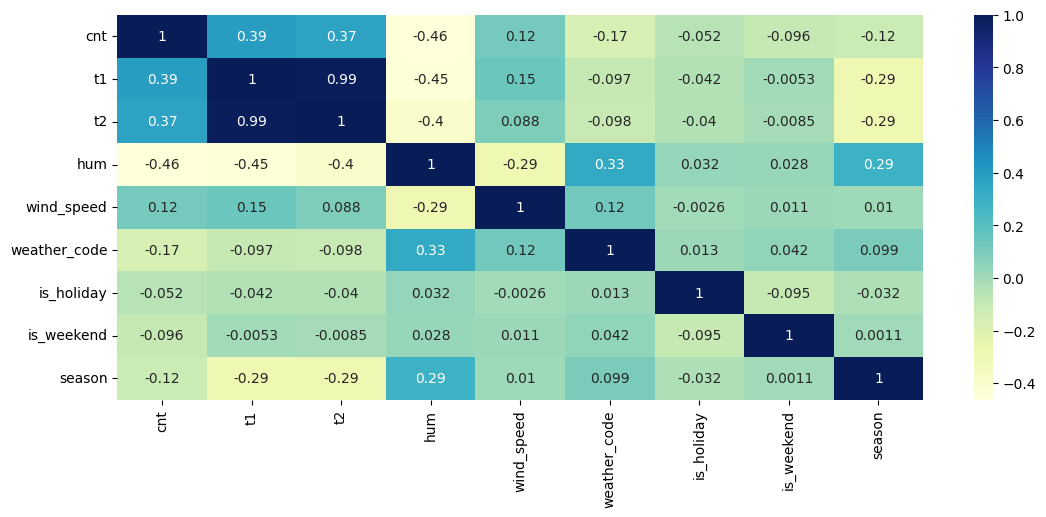

In [ ]:
#Visualisasi korelasi antar variabel
plt.figure(figsize=(13,5))
sns.heatmap(df.select_dtypes("number").corr(), cmap="YlGnBu", annot=True);

In [ ]:
# Membuat kolom baru untuk tahun, bulan, hari, dan jam
df['timestamp'] = pd.to_datetime(df['timestamp'])
df["year"] = df["timestamp"].apply(lambda x:x.year)
df["month"] = df["timestamp"].apply(lambda x:x.month)
df["day"] = df["timestamp"].apply(lambda x:x.day)
df["hour"] = df["timestamp"].apply(lambda x:x.hour)
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4


In [ ]:
# Merapikan kolom
ordered_cols =['timestamp', 'is_weekend', 'is_holiday','season', 'year', 'month','day','hour', 'weather_code','t1', 't2', 'hum', 'wind_speed', 'cnt']
df = df[ordered_cols]
df.head()

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t1,t2,hum,wind_speed,cnt
0,2015-01-04 00:00:00,1.0,0.0,3.0,2015,1,4,0,3.0,3.0,2.0,93.0,6.0,182
1,2015-01-04 01:00:00,1.0,0.0,3.0,2015,1,4,1,1.0,3.0,2.5,93.0,5.0,138
2,2015-01-04 02:00:00,1.0,0.0,3.0,2015,1,4,2,1.0,2.5,2.5,96.5,0.0,134
3,2015-01-04 03:00:00,1.0,0.0,3.0,2015,1,4,3,1.0,2.0,2.0,100.0,0.0,72
4,2015-01-04 04:00:00,1.0,0.0,3.0,2015,1,4,4,1.0,2.0,0.0,93.0,6.5,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   is_weekend    17414 non-null  float64       
 2   is_holiday    17414 non-null  float64       
 3   season        17414 non-null  float64       
 4   year          17414 non-null  int64         
 5   month         17414 non-null  int64         
 6   day           17414 non-null  int64         
 7   hour          17414 non-null  int64         
 8   weather_code  17414 non-null  float64       
 9   t1            17414 non-null  float64       
 10  t2            17414 non-null  float64       
 11  hum           17414 non-null  float64       
 12  wind_speed    17414 non-null  float64       
 13  cnt           17414 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(5)
memory usage: 1.9 MB


In [ ]:
# Untuk mengubah tipe data dari beberapa kolom agar lebih sesuai
df['is_holiday'] = df['is_holiday'].astype('int64')
df['is_weekend'] = df['is_weekend'].astype('int64')
df['weather_code'] = df['weather_code'].astype('int64')
df['season'] = df['season'].astype('int64')
df['cnt'] = df['cnt'].astype('float64')
df.dtypes

timestamp       datetime64[ns]
is_weekend               int64
is_holiday               int64
season                   int64
year                     int64
month                    int64
day                      int64
hour                     int64
weather_code             int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
cnt                    float64
dtype: object

# **Data Cleaning**

In [ ]:
# Ini untuk mengecek mising value pada dataset
df.isnull().sum()

timestamp       0
is_weekend      0
is_holiday      0
season          0
year            0
month           0
day             0
hour            0
weather_code    0
t1              0
t2              0
hum             0
wind_speed      0
cnt             0
dtype: int64

In [ ]:
# Mengecek data yang duplikat
df.duplicated().value_counts()

False    17414
dtype: int64

**- Melakukan pengecekan outlier pada kolom cnt, t1, t2, hum, dan wind speed**

<Axes: >

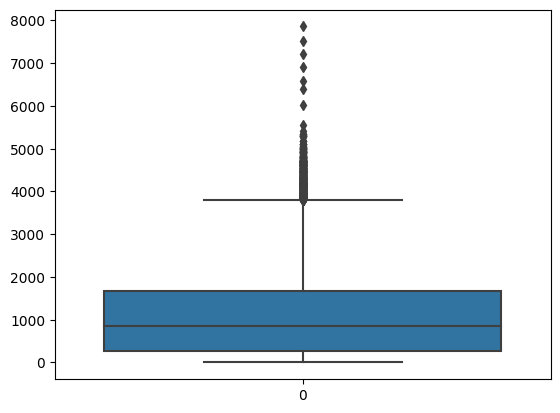

In [ ]:
# Data Outlier dengan box plot
sns.boxplot(df['cnt'])

<Axes: >

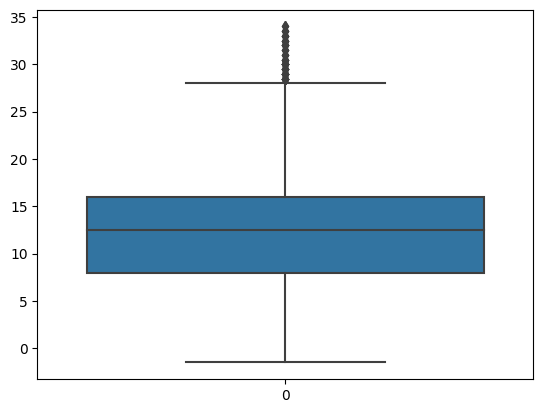

In [ ]:
sns.boxplot(df['t1'])

<Axes: >

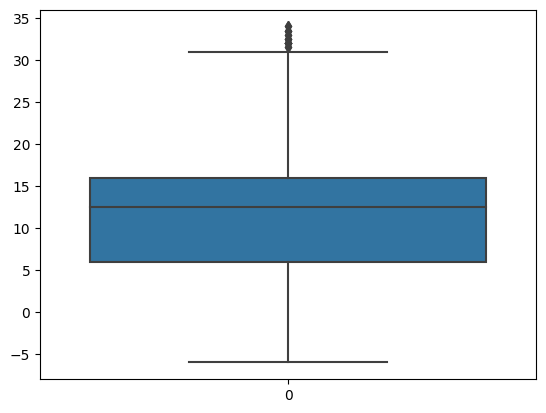

In [ ]:
sns.boxplot(df['t2'])

<Axes: >

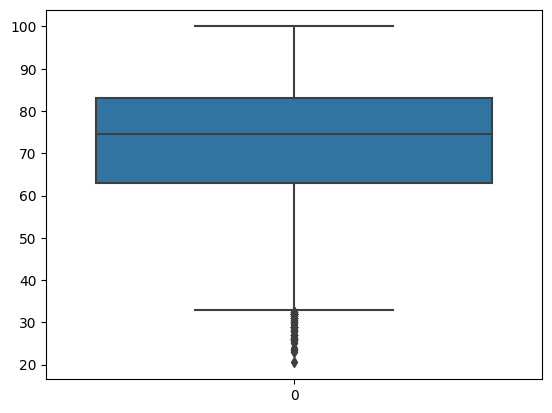

In [ ]:
sns.boxplot(df['hum'])

<Axes: >

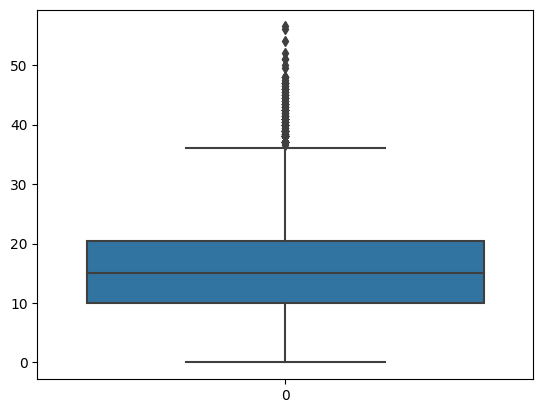

In [ ]:
sns.boxplot(df['wind_speed'])

In [ ]:
# Mengecek outlier pada kolom yang bertipe data float dengan metode IQR
df['cnt'] = df['cnt'].astype('float')
for col in df.columns:
    if isinstance(df[col][0], float):
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - (1.5 * IQR)
        batas_atas = Q3 + (1.5 * IQR)
        jumlah_outlier = df[(df[col] < batas_bawah) | (df[col] > batas_atas)].shape[0]
        print('Jumlah data outlier', col, "adalah :", jumlah_outlier)

Jumlah data outlier t1 adalah : 64
Jumlah data outlier t2 adalah : 19
Jumlah data outlier hum adalah : 71
Jumlah data outlier wind_speed adalah : 236
Jumlah data outlier cnt adalah : 675


# **EDA**

In [ ]:
# Untuk melakukan eksplor data.
# Membuat variabel baru df1, yang isinya berupa copy dari df
df1 = df.copy()
df1.head()

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t1,t2,hum,wind_speed,cnt
0,2015-01-04 00:00:00,1,0,3,2015,1,4,0,3,3.0,2.0,93.0,6.0,182.0
1,2015-01-04 01:00:00,1,0,3,2015,1,4,1,1,3.0,2.5,93.0,5.0,138.0
2,2015-01-04 02:00:00,1,0,3,2015,1,4,2,1,2.5,2.5,96.5,0.0,134.0
3,2015-01-04 03:00:00,1,0,3,2015,1,4,3,1,2.0,2.0,100.0,0.0,72.0
4,2015-01-04 04:00:00,1,0,3,2015,1,4,4,1,2.0,0.0,93.0,6.5,47.0


In [ ]:
#Mengubah kolom
# Kolom Season
df1['season'].replace(0, 'Spring', inplace=True)
df1['season'].replace(1, 'Summer', inplace=True)
df1['season'].replace(2, 'Fall', inplace=True)
df1['season'].replace(3, 'Winter', inplace=True)

#--------------------------------------------------

# Kolom Is Holiday
df1['is_holiday'].replace(1, 'Holiday', inplace=True)
df1['is_holiday'].replace(0, 'Non-holiday', inplace=True)

#--------------------------------------------------------

# Kolom Is weekend
df1['is_weekend'].replace(1, 'Weekend', inplace=True)
df1['is_weekend'].replace(0, 'Non-weekend', inplace=True)


#--------------------------------------------------------

# Kolom Weather Codes
df1['weather_code'].replace(1, 'Clear', inplace=True)
df1['weather_code'].replace(2, 'scattered clouds', inplace=True)
df1['weather_code'].replace(3, 'Broken clouds', inplace=True)
df1['weather_code'].replace(4, 'Cloudy', inplace=True)
df1['weather_code'].replace(7, 'Rain', inplace=True)
df1['weather_code'].replace(10, 'rain with thunderstorm', inplace=True)
df1['weather_code'].replace(26, 'snowfall', inplace=True)
df1['weather_code'].replace(94, 'Freezing Fog', inplace=True)
df1.head(5)

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t1,t2,hum,wind_speed,cnt
0,2015-01-04 00:00:00,Weekend,Non-holiday,Winter,2015,1,4,0,Broken clouds,3.0,2.0,93.0,6.0,182.0
1,2015-01-04 01:00:00,Weekend,Non-holiday,Winter,2015,1,4,1,Clear,3.0,2.5,93.0,5.0,138.0
2,2015-01-04 02:00:00,Weekend,Non-holiday,Winter,2015,1,4,2,Clear,2.5,2.5,96.5,0.0,134.0
3,2015-01-04 03:00:00,Weekend,Non-holiday,Winter,2015,1,4,3,Clear,2.0,2.0,100.0,0.0,72.0
4,2015-01-04 04:00:00,Weekend,Non-holiday,Winter,2015,1,4,4,Clear,2.0,0.0,93.0,6.5,47.0


In [ ]:
# Mengubah nilai pada kolom hari dan bulan berdasarkan nama-nama hari dan bulan.
df1['day'] = df1['timestamp'].dt.day_name()
df1['month'] = df1['timestamp'].dt.month_name()
df1.head(2)

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t1,t2,hum,wind_speed,cnt
0,2015-01-04 00:00:00,Weekend,Non-holiday,Winter,2015,January,Sunday,0,Broken clouds,3.0,2.0,93.0,6.0,182.0
1,2015-01-04 01:00:00,Weekend,Non-holiday,Winter,2015,January,Sunday,1,Clear,3.0,2.5,93.0,5.0,138.0


**- Visualisasikan permintaan penyewaan sepeda**

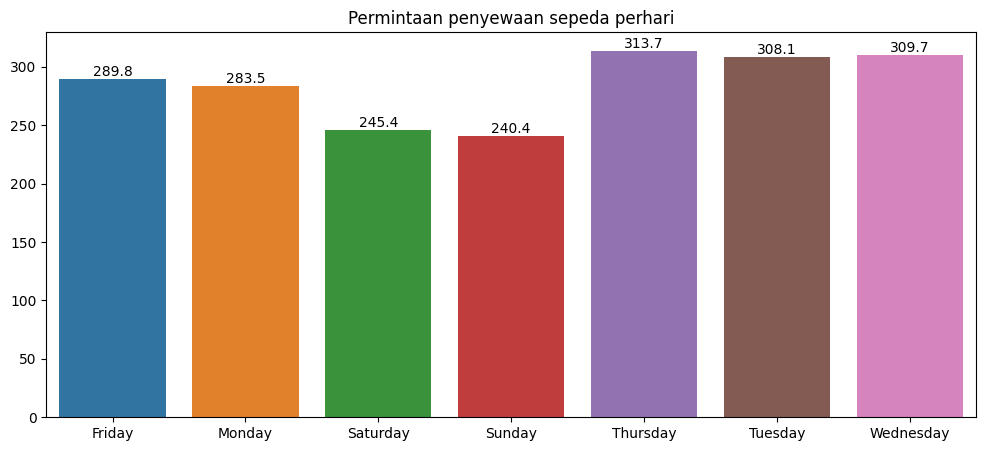

In [ ]:
# Permintaan penyewaaan sepeda berdasarkan hari
dayly_bike_share  = (df1.groupby('day')['cnt'].sum()/10000).round(1)
dayly_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=dayly_bike_share.index, y=dayly_bike_share.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda perhari")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

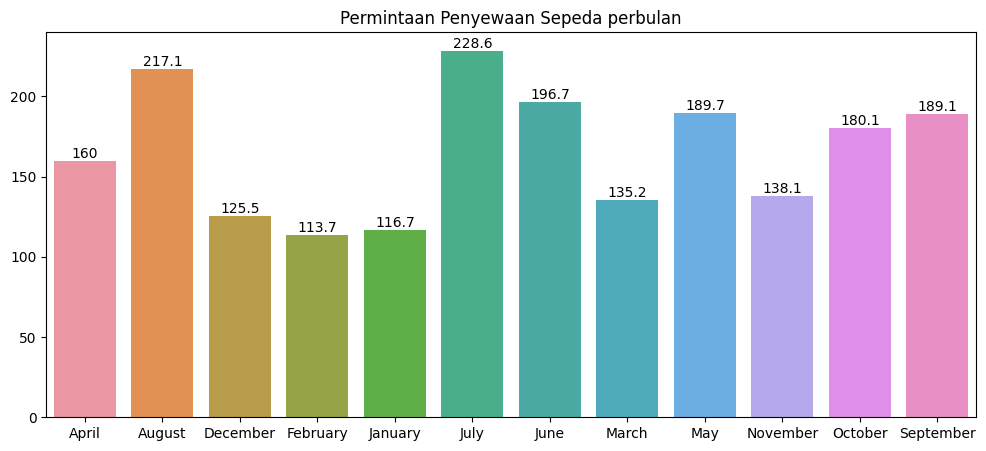

In [ ]:
# Permintaan penyewaan sepeda perbulan

monthly_bike_share  = (df1.groupby('month')['cnt'].sum()/10000).round(1)
monthly_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=monthly_bike_share.index, y=monthly_bike_share.values, errorbar=None)
ax.set_title("Permintaan Penyewaan Sepeda perbulan")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

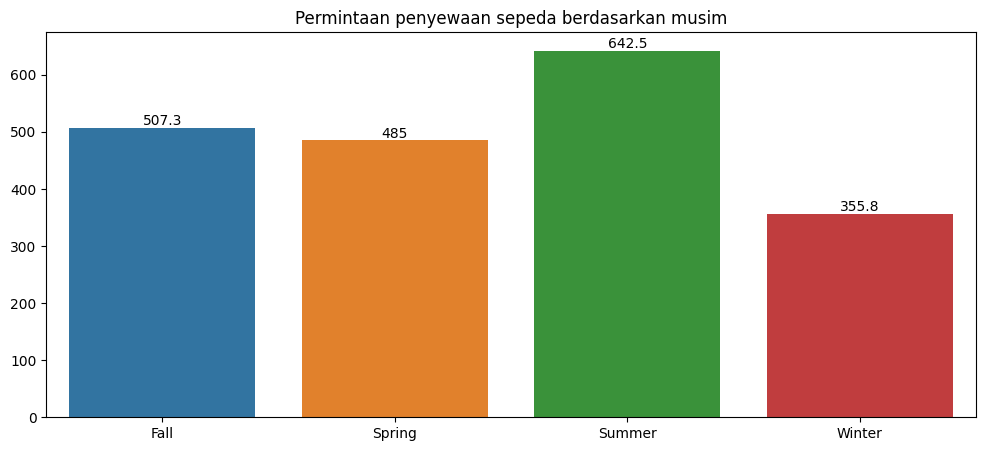

In [ ]:
# Permintaan penyewaan sepeda berdasarkan musim

seasonally_bike_share  = (df1.groupby('season')['cnt'].sum()/10000).round(1)
seasonally_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=seasonally_bike_share.index, y=seasonally_bike_share.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda berdasarkan musim")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

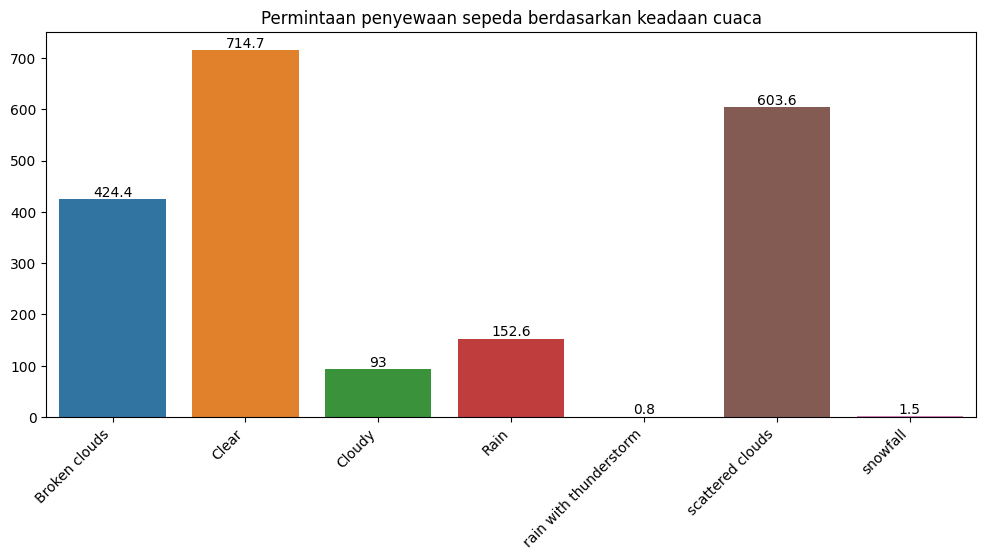

In [ ]:
# Permintaan penyewaan sepeda berdasarkan tinggkat keadaan cuaca
weather_bike_share  = (df1.groupby('weather_code')['cnt'].sum()/10000).round(1)
weather_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weather_bike_share.index, y=weather_bike_share.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda berdasarkan keadaan cuaca")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('')
for i in ax.containers:
    ax.bar_label(i)

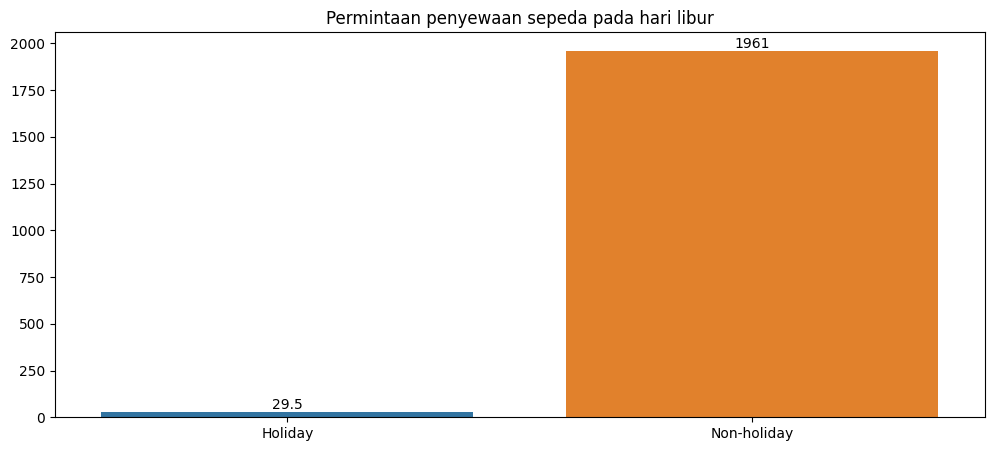

In [ ]:
# Permintaan penyewaan sepeda pad hari libur

weakday_bike_share  = (df1.groupby("is_holiday")['cnt'].sum()/10000).round(1)
weakday_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weakday_bike_share.index, y=weakday_bike_share.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda pada hari libur")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

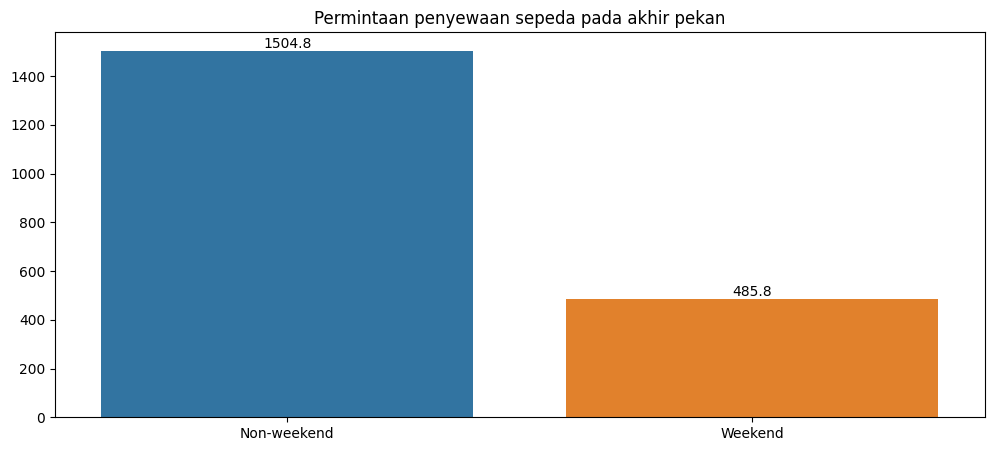

In [ ]:
# Permintaan penyewaan sepeda pada akhir pekan

weekend_bike_share  = (df1.groupby('is_weekend')['cnt'].sum()/10000).round(1)
weekend_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=weekend_bike_share.index, y=weekend_bike_share.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda pada akhir pekan")
ax.set_xlabel('')

for i in ax.containers:
    ax.bar_label(i)

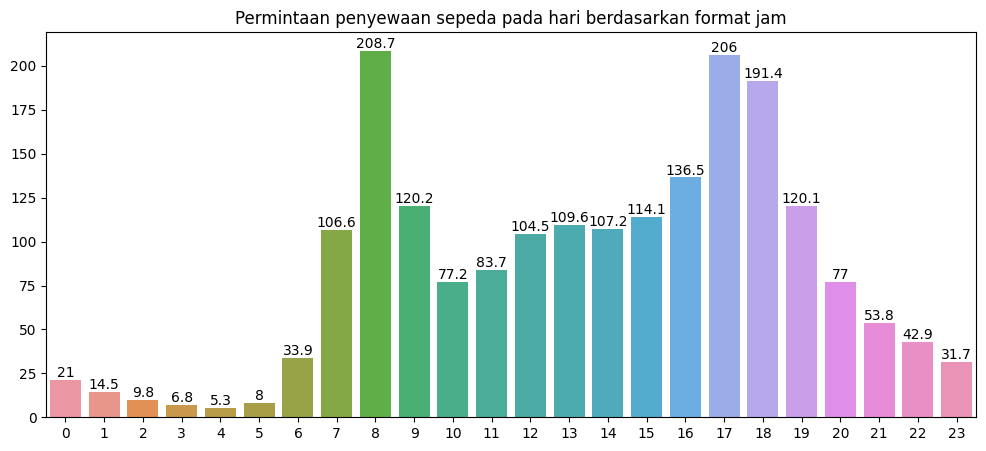

In [ ]:
# Permintaan penyewaan sepeda pada hari kerja atau hari libur(akhir pekan dan liburan)
hourly_bike_share = (df1.groupby('hour')['cnt'].sum()/10000).round(1)
hourly_bike_share

plt.figure(figsize=(12,5))

ax=sns.barplot(x=hourly_bike_share.index, y=hourly_bike_share.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda pada hari berdasarkan format jam")
ax.set_xlabel('')

for i in ax.containers: ax.bar_label(i)

- Penyewaan sepeda juga mengalami penurunan pada akhir pekan dan hari libur. bisa jadi di sebabkan karena tidak ada yang bekerja pad hari itu sehingga penyewaan sepeda turun.
- Memasukin musim dingin penyewaan sepeda juga mengalami penuruanan karena pada musim itu merupakan musim liburan.
- Orang-orang paling sering menyewa sepeda pada hari-hari ketika cuaca "cerah". Di tempat kedua adalah hari-hari dengan "awan berserakan" dan di tempat ketiga adalah hari-hari dengan "awan pecah". Menariknya, lebih banyak sepeda yang disewa pada hari "hujan" dibandingkan pada hari "berawan". Pada hari-hari bersalju dan badai, jumlah penyewaan sepeda hampir nol.
- Dapat di simpulakn bahwa sebagian besar penyewa sepeda adalah golongan orang yang bekerja, yang membutuhkan traksportasi yang ringkas dan mudah.
- Penyewaan sepeda meningkat pada jam ke 7 hingga ke jam 19, dengan kata lain itu adalah saat pagi hingga waktu sore hari menjelang malam, yang mana itu adalah jam orang bekerja.


**Mengecek korelasi antar variabel terhadap kolom cnt**

In [ ]:
target_corr = df.select_dtypes("number").corr().drop(["cnt"])
target_corr

,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t1,t2,hum,wind_speed,cnt
is_weekend,1.000000,-0.094898,0.001067,0.003049,-0.005406,0.005721,0.001803,0.042362,-0.005342,-0.008510,0.028098,0.011479,-0.096499
is_holiday,-0.094898,1.000000,-0.032488,0.034631,-0.011511,0.042657,-0.000288,0.012939,-0.042233,-0.040051,0.032068,-0.002606,-0.051698
season,0.001067,-0.032488,1.000000,0.024400,0.203249,-0.006460,0.000006,0.098976,-0.285851,-0.285900,0.290381,0.010305,-0.116180
year,0.003049,0.034631,0.024400,1.000000,-0.026547,-0.021935,0.000542,-0.009234,-0.037959,-0.044972,0.072443,-0.094739,0.010046
month,-0.005406,-0.011511,0.203249,-0.026547,1.000000,0.012614,-0.000312,-0.033253,0.332712,0.368366,0.113149,-0.086383,0.063757
day,0.005721,0.042657,-0.006460,-0.021935,0.012614,1.000000,-0.000310,0.001904,0.005072,0.006791,-0.020868,0.002040,-0.017887
hour,0.001803,-0.000288,0.000006,0.000542,-0.000312,-0.000310,1.000000,-0.041786,0.168708,0.153956,-0.295653,0.141792,0.324423
weather_code,0.042362,0.012939,0.098976,-0.009234,-0.033253,0.001904,-0.041786,1.000000,-0.097114,-0.098385,0.334750,0.124803,-0.166633
t1,-0.005342,-0.042233,-0.285851,-0.037959,0.332712,0.005072,0.168708,-0.097114,1.000000,0.988344,-0.447781,0.145471,0.388798
t2,-0.008510,-0.040051,-0.285900,-0.044972,0.368366,0.006791,0.153956,-0.098385,0.988344,1.000000,-0.403495,0.088409,0.369035


In [ ]:
target = target_corr["cnt"].sort_values(ascending=False)
target

t1              0.388798
t2              0.369035
hour            0.324423
wind_speed      0.116295
month           0.063757
year            0.010046
day            -0.017887
is_holiday     -0.051698
is_weekend     -0.096499
season         -0.116180
weather_code   -0.166633
hum            -0.462901
Name: cnt, dtype: float64

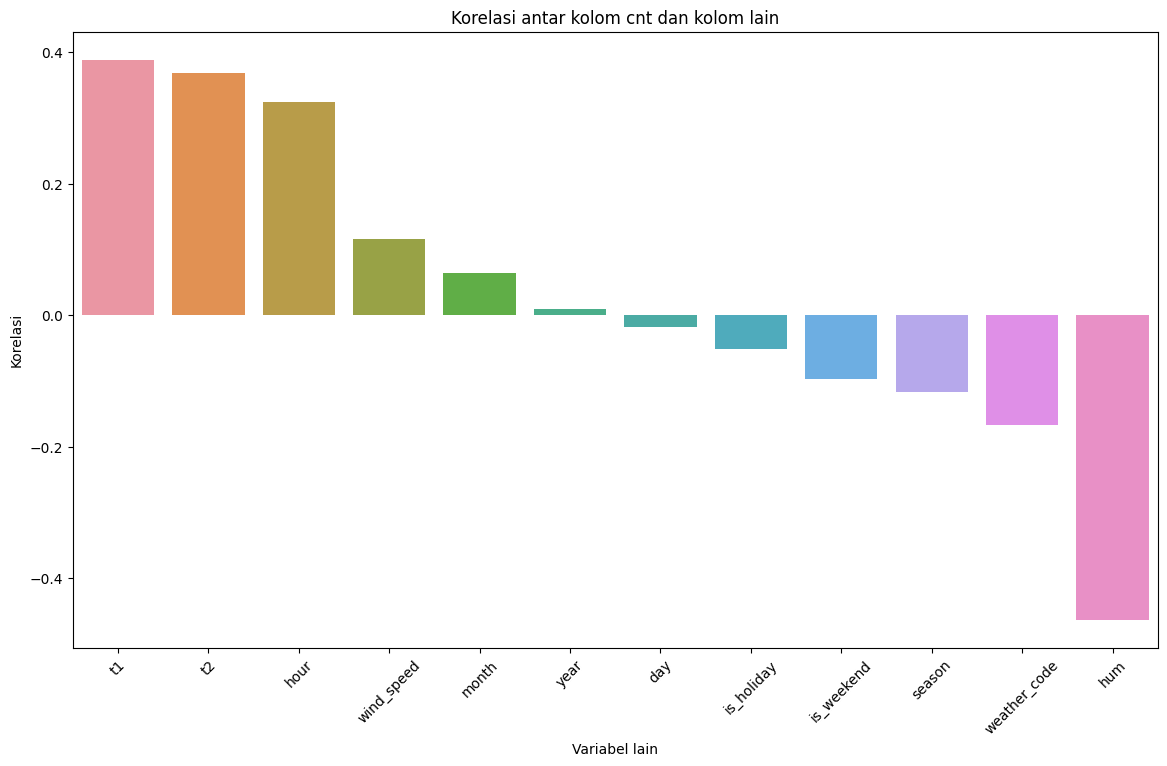

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x=target.index, y=target.values)
plt.xlabel('Variabel lain')
plt.ylabel('Korelasi')
plt.title('Korelasi antar kolom cnt dan kolom lain')
plt.xticks(rotation=45)
plt.show()

- Diketahui ternyata kolom "cnt" berkorelasi tinggi positif dengan kolom suhu terasa dan sebenarnya serta kecepatan angin.

In [ ]:
num_att = df[['t1', 't2', 'hum', 'wind_speed','cnt']]
# menghitung vif score
vif_scores = pd.Series([variance_inflation_factor(num_att.values, i) for i in range(num_att.shape[1])], index=num_att.columns)
print(vif_scores)

t1            242.720694
t2            168.074704
hum             7.347956
wind_speed      5.871424
cnt             2.598831
dtype: float64


In [ ]:
# Menghapus kolom yang memiliki multikolinearitas tinggi
# karena mengurangi kekuatan koefisien dan melemahkan ukuran statistik untuk mempercayai nilai p dalam mengidentifikasi variabel independen yang signifikan.
df = df.drop(["t1"], axis = 1)
df.head()

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t2,hum,wind_speed,cnt
0,2015-01-04 00:00:00,1,0,3,2015,1,4,0,3,2.0,93.0,6.0,182.0
1,2015-01-04 01:00:00,1,0,3,2015,1,4,1,1,2.5,93.0,5.0,138.0
2,2015-01-04 02:00:00,1,0,3,2015,1,4,2,1,2.5,96.5,0.0,134.0
3,2015-01-04 03:00:00,1,0,3,2015,1,4,3,1,2.0,100.0,0.0,72.0
4,2015-01-04 04:00:00,1,0,3,2015,1,4,4,1,0.0,93.0,6.5,47.0


#**Modelling**

In [ ]:
#Membagi data menjadi variabel dependent dan independent
x = df.drop(['timestamp', 'cnt'], axis=1)  # Variabel independen (fitur)
y = df['cnt']

In [ ]:
# Melakukan splliting data menjadi data train dan data test (80% dan 20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train.shape[0], x_test.shape[0]))

Training Set: 13931 rows
Test Set: 3483 rows


In [ ]:
#Memanggil tool untuk melakukan standarisasi pada tiap kolom yang akan dimodelling
#feature scaling
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
scaling_pipeline.fit(x_train)
x_train_sc = scaling_pipeline.transform(x_train)
x_test_sc = scaling_pipeline.transform(x_test)

In [ ]:
#Membuat list yang berisikan model model yang akan diuji
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("Light Gradient Boosting Machine", LGBMRegressor()),
    ("AdaBoost Regressor", AdaBoostRegressor()),
    ("Extreme Gradient Boosting", xgb.XGBRegressor()),
    ("K Neighbors Regressor", KNeighborsRegressor())
]

# **Evaluasi**

In [ ]:
results = []
best_model = None
best_r2 = -float('inf')
for model_name, model in models:
    # Latih model pada data pelatihan
    model.fit(x_train_sc, y_train)

    # Prediksi data testing
    y_pred = model.predict(x_test_sc)

    # Perhitungan RMSE pada data testing
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Perhitungan R2 pada data testing
    r2 = r2_score(y_test, y_pred)

    # Perhitungan MAE pada data testing
    mae = mean_absolute_error(y_test, y_pred)

    # Menambahkan hasil ke dalam list results
    results.append([model_name, rmse, mae, r2])

    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

    print(f"Model: {model_name}")
    print("RMSE pada data testing:", rmse)
    print("MAE pada data testing:", mae)
    print("R2 pada data testing:", r2)
    print()

Model: Linear Regression
RMSE pada data testing: 916.3224304078693
MAE pada data testing: 674.5846763759355
R2 pada data testing: 0.2984458409206724

Model: Ridge Regression
RMSE pada data testing: 916.322676003547
MAE pada data testing: 674.5857899879102
R2 pada data testing: 0.29844546485502865

Model: Lasso Regression
RMSE pada data testing: 916.3005715051265
MAE pada data testing: 674.4986135014856
R2 pada data testing: 0.2984793117180954

Model: Random Forest
RMSE pada data testing: 233.16384871102218
MAE pada data testing: 131.84766580534023
R2 pada data testing: 0.9545758301563317

Model: Gradient Boosting Regressor
RMSE pada data testing: 369.4143012024847
MAE pada data testing: 244.70485742821484
R2 pada data testing: 0.8859771276831249

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info]

In [ ]:
# Membuat dataframe dari list results
hasil1 = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
hasil1

,Model,RMSE,MAE,R2
0,Linear Regression,916.322430,674.584676,0.298446
1,Ridge Regression,916.322676,674.585790,0.298445
2,Lasso Regression,916.300572,674.498614,0.298479
3,Random Forest,233.163849,131.847666,0.954576
4,Gradient Boosting Regressor,369.414301,244.704857,0.885977
5,Light Gradient Boosting Machine,229.697333,136.112029,0.955916
6,AdaBoost Regressor,772.785423,636.074062,0.501021
7,Extreme Gradient Boosting,222.598518,134.712780,0.958599
8,K Neighbors Regressor,707.189505,444.256962,0.582135


In [ ]:
# Menampilkan model terbaik berdasarkan R2 tertinggi
print(f"Model terbaik berdasarkan R2 tertinggi: {best_model} dengan R2 = {best_r2:}")

Model terbaik berdasarkan R2 tertinggi: Extreme Gradient Boosting dengan R2 = 0.9585991646592645


# **Handling Outlier**

In [ ]:
#remove outlier
df_new = df.copy()
numeric_cols = df_new.select_dtypes(include=[np.number])
for feature in numeric_cols:
    q1 = df_new[feature].quantile(0.25)
    q3 = df_new[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_new.loc[df_new[feature]<lower_limit, feature] = lower_limit
    df_new.loc[df_new[feature]>upper_limit, feature] = upper_limit

In [ ]:
x1 = df_new.drop(['timestamp', 'cnt'], axis=1)
y1 = df_new['cnt']

In [ ]:
# Melakukan splliting data menjadi data train dan data test (80% dan 20%)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=0)
print ('Training Set: %d rows\nTest Set: %d rows' % (x_train1.shape[0], x_test1.shape[0]))

Training Set: 13931 rows
Test Set: 3483 rows


In [ ]:
#Memanggil tool untuk melakukan standarisasi pada tiap kolom yang akan dimodelling
#feature scaling
scaling_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
scaling_pipeline.fit(x_train1)
x_train_sc1 = scaling_pipeline.transform(x_train1)
x_test_sc1 = scaling_pipeline.transform(x_test1)

In [ ]:
#Membuat list yang berisikan model model yang akan diuji
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("Light Gradient Boosting Machine", LGBMRegressor()),
    ("AdaBoost Regressor", AdaBoostRegressor()),
    ("Extreme Gradient Boosting", xgb.XGBRegressor()),
    ("K Neighbors Regressor", KNeighborsRegressor())
]

In [ ]:
results = []
best_model = None
best_r2 = -float('inf')
for model_name, model in models:
    # Latih model pada data pelatihan
    model.fit(x_train_sc1, y_train1)

    # Prediksi data testing
    y_pred1 = model.predict(x_test_sc1)

    # Perhitungan RMSE pada data testing
    rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))

    # Perhitungan R2 pada data testing
    r2 = r2_score(y_test1, y_pred1)

    # Perhitungan MAE pada data testing
    mae = mean_absolute_error(y_test, y_pred1)

    # Menambahkan hasil ke dalam list results
    results.append([model_name, rmse, mae, r2])

    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

    print(f"Model: {model_name}")
    print("RMSE pada data testing:", rmse)
    print("MAE pada data testing:", mae)
    print("R2 pada data testing:", r2)
    print()

Model: Linear Regression
RMSE pada data testing: 857.7715634258034
MAE pada data testing: 667.4402042469793
R2 pada data testing: 0.3084342753939131

Model: Ridge Regression
RMSE pada data testing: 857.7715497607411
MAE pada data testing: 667.4417529508058
R2 pada data testing: 0.30843429742842443

Model: Lasso Regression
RMSE pada data testing: 857.7351276963321
MAE pada data testing: 667.4271692826609
R2 pada data testing: 0.30849302568959525

Model: Random Forest
RMSE pada data testing: 220.00270910124334
MAE pada data testing: 150.45514857881136
R2 pada data testing: 0.9545068269485988

Model: Gradient Boosting Regressor
RMSE pada data testing: 344.1707109514142
MAE pada data testing: 250.25780643376143
R2 pada data testing: 0.8886633910903773

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

In [ ]:
# Membuat dataframe dari list results
hasil = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
hasil

,Model,RMSE,MAE,R2
0,Linear Regression,857.771563,667.440204,0.308434
1,Ridge Regression,857.771550,667.441753,0.308434
2,Lasso Regression,857.735128,667.427169,0.308493
3,Random Forest,220.002709,150.455149,0.954507
4,Gradient Boosting Regressor,344.170711,250.257806,0.888663
5,Light Gradient Boosting Machine,217.147120,151.270065,0.955680
6,AdaBoost Regressor,635.253901,510.926351,0.620698
7,Extreme Gradient Boosting,207.140482,148.785341,0.959671
8,K Neighbors Regressor,655.537238,448.650825,0.596090


In [ ]:
# Menampilkan model terbaik berdasarkan R2 tertinggi
print(f"Model terbaik berdasarkan R2 tertinggi: {best_model} dengan R2 = {best_r2:}")

Model terbaik berdasarkan R2 tertinggi: Extreme Gradient Boosting dengan R2 = 0.9596707507394712


- Saat dilakukan handling outlier dengan menghapus outlier tersebut, model terbaiknya masih tetap Extreme Gradient Boosting. Namun pada nilai R2 mengalami peningkatan dari 0.95859 menjadi 0,95967

# **Feature Importance**

In [ ]:
#Extreme Gradient Boosting
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train_sc1, y_train1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_feature_importance = xgb_model.feature_importances_
feature_names = x.columns

xgb_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_feature_importance})
xgb_feature_importance_df = xgb_feature_importance_df.sort_values(by='Importance', ascending=False)
xgb_feature_importance_df

,Feature,Importance
6,hour,0.489215
0,is_weekend,0.249529
8,t2,0.080849
7,weather_code,0.050180
9,hum,0.045692
2,season,0.039017
4,month,0.015129
5,day,0.012632
3,year,0.009196
10,wind_speed,0.008562


- Dari hasil tersebut menunjukkan bahwa kolom hour paling berpengaruh pada jumlah penyewaan sepeda di kota London

# **Prediksi**

In [ ]:
data = pd.read_excel("data cuaca 1&2-01-2023.xlsx")
data

,timestamp,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2023-01-01 00:00:00,12.0,10.0,81.0,18,1,1,1,3
1,2023-01-01 01:00:00,11.0,9.0,84.0,16,1,1,1,3
2,2023-01-01 02:00:00,11.0,9.0,84.0,16,1,1,1,3
3,2023-01-01 03:00:00,10.0,8.0,81.0,14,1,1,1,3
4,2023-01-01 04:00:00,10.0,8.0,76.0,20,1,1,1,3
5,2023-01-01 05:00:00,10.0,7.0,87.0,25,1,1,1,3
6,2023-01-01 06:00:00,10.0,8.0,87.0,38,1,1,1,3
7,2023-01-01 07:00:00,10.0,8.5,87.0,33,1,1,1,3
8,2023-01-01 08:00:00,10.0,7.8,87.0,35,1,1,1,3
9,2023-01-01 09:00:00,10.0,8.0,84.0,37,1,1,1,3


In [ ]:
# Membuat kolom baru untuk tahun, bulan, hari, dan jam
data['timestamp'] = pd.to_datetime(data['timestamp'])
data["year"] = data["timestamp"].apply(lambda x:x.year)
data["month"] = data["timestamp"].apply(lambda x:x.month)
data["day"] = data["timestamp"].apply(lambda x:x.day)
data["hour"] = data["timestamp"].apply(lambda x:x.hour)
data.head()

,timestamp,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day,hour
0,2023-01-01 00:00:00,12.0,10.0,81.0,18,1,1,1,3,2023,1,1,0
1,2023-01-01 01:00:00,11.0,9.0,84.0,16,1,1,1,3,2023,1,1,1
2,2023-01-01 02:00:00,11.0,9.0,84.0,16,1,1,1,3,2023,1,1,2
3,2023-01-01 03:00:00,10.0,8.0,81.0,14,1,1,1,3,2023,1,1,3
4,2023-01-01 04:00:00,10.0,8.0,76.0,20,1,1,1,3,2023,1,1,4


In [ ]:
# Merapikan kolom
ordered_colss =['timestamp', 'is_weekend', 'is_holiday','season', 'year', 'month','day','hour', 'weather_code','t1', 't2', 'hum', 'wind_speed']
data = data[ordered_colss]
data.head()

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t1,t2,hum,wind_speed
0,2023-01-01 00:00:00,1,1,3,2023,1,1,0,1,12.0,10.0,81.0,18
1,2023-01-01 01:00:00,1,1,3,2023,1,1,1,1,11.0,9.0,84.0,16
2,2023-01-01 02:00:00,1,1,3,2023,1,1,2,1,11.0,9.0,84.0,16
3,2023-01-01 03:00:00,1,1,3,2023,1,1,3,1,10.0,8.0,81.0,14
4,2023-01-01 04:00:00,1,1,3,2023,1,1,4,1,10.0,8.0,76.0,20


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     48 non-null     datetime64[ns]
 1   is_weekend    48 non-null     int64         
 2   is_holiday    48 non-null     int64         
 3   season        48 non-null     int64         
 4   year          48 non-null     int64         
 5   month         48 non-null     int64         
 6   day           48 non-null     int64         
 7   hour          48 non-null     int64         
 8   weather_code  48 non-null     int64         
 9   t1            48 non-null     float64       
 10  t2            48 non-null     float64       
 11  hum           48 non-null     float64       
 12  wind_speed    48 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 5.0 KB


In [ ]:
# Menghapus kolom yang tidak ada pada proses analisis pada data training sebelumnya
data.drop(columns=['timestamp', 't1'], inplace=True)

<ipython-input-55-dce3fa37b2cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['timestamp', 't1'], inplace=True)


In [ ]:
#Menyimpan model K-Nearest Neighbors (KNN) ke dalam sebuah file
model_terbaik = 'best_model.sav'
pickle.dump(xgb_model, open(model_terbaik, 'wb'))

In [ ]:
#Memuat model yang telah disimpan dari file 'best_model.sav' dan kemudian mengukur akurasi model terhadap data uji
loaded_model = pickle.load(open(model_terbaik, 'rb'))
result = loaded_model.score(x_test_sc1, y_test1)
result

0.9596707507394712

In [ ]:
predict_val = scaling_pipeline.transform(data)

In [ ]:
# Lakukan prediksi menggunakan model XGBoost
y_pred = xgb_model.predict(predict_val)
# Ganti nilai negatif dengan 0
y_pred_non_negative = np.maximum(y_pred, 0)
# Tampilkan hasil prediksi
print("Hasil prediksi dengan model Extreme Gradient Boosting:")
print(y_pred_non_negative)

Hasil prediksi dengan model Extreme Gradient Boosting:
[ 901.86414   792.7462    393.09323   271.4979    215.9135      0.
    0.          0.          0.        225.02707   525.0301    721.94244
  885.2379   1084.3884    541.8307    227.12372    27.913805   22.93273
    0.          0.          0.          0.        102.0448      0.
 1054.5079    889.4979    469.76828   395.66385   355.6713    280.06042
  382.3423    273.0254    125.51062    76.070946  448.69583   824.0951
  681.1069    647.63257  1290.1261   1299.6571    794.10876   609.6978
  241.23177   560.53296   272.17108   237.08804    86.28611     0.      ]


In [ ]:
data['prediksi'] = y_pred_non_negative
data

<ipython-input-60-f60bbc25fedf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['prediksi'] = y_pred_non_negative


,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t2,hum,wind_speed,prediksi
0,1,1,3,2023,1,1,0,1,10.0,81.0,18,901.864136
1,1,1,3,2023,1,1,1,1,9.0,84.0,16,792.746216
2,1,1,3,2023,1,1,2,1,9.0,84.0,16,393.093231
3,1,1,3,2023,1,1,3,1,8.0,81.0,14,271.497894
4,1,1,3,2023,1,1,4,1,8.0,76.0,20,215.913498
5,1,1,3,2023,1,1,5,1,7.0,87.0,25,0.000000
6,1,1,3,2023,1,1,6,1,8.0,87.0,38,0.000000
7,1,1,3,2023,1,1,7,1,8.5,87.0,33,0.000000
8,1,1,3,2023,1,1,8,1,7.8,87.0,35,0.000000
9,1,1,3,2023,1,1,9,1,8.0,84.0,37,225.027069


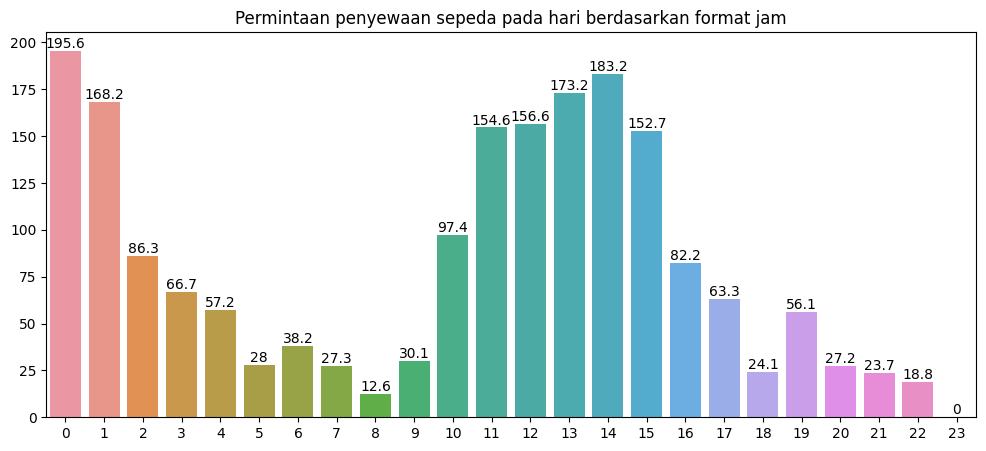

In [ ]:
# Permintaan penyewaan sepeda pada tiap jam
hourly_bike1 = (data.groupby('hour')['prediksi'].sum()/10).round(1)
hourly_bike1

plt.figure(figsize=(12,5))

ax=sns.barplot(x=hourly_bike1.index, y=hourly_bike1.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda pada hari berdasarkan format jam")
ax.set_xlabel('')

for i in ax.containers: ax.bar_label(i)

In [ ]:
data['prediksi'].sum()

19233.137

In [ ]:
# Melatih model dengan early stopping
eval_set = [(x_train_sc1, y_train1), (x_test_sc1, y_test1)]
xgb_model.fit(x_train_sc1, y_train1, eval_metric=["rmse"], eval_set=eval_set, early_stopping_rounds=10, verbose=False)

# Model yang terbaik adalah yang memberikan skor terendah pada data validasi
best_iteration = xgb_model.best_iteration
best_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, n_estimators=best_iteration)
best_model.fit(x_train_sc1, y_train1)

# Prediksi menggunakan model terbaik
y_pred = best_model.predict(x_test_sc1)

# Evaluasi performa model terbaik
rmse = np.sqrt(mean_squared_error(y_test1, y_pred, squared=False))
print(f"RMSE on validation set: {rmse}")

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


RMSE on validation set: 14.373715182078882


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


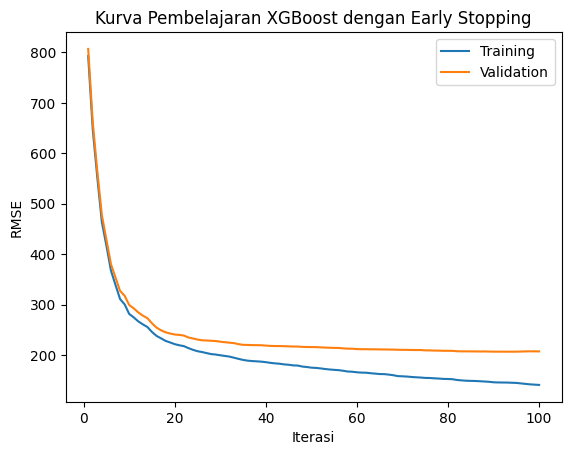

In [ ]:
# Melatih model dengan early stopping
eval_set = [(x_train_sc1, y_train1), (x_test_sc1, y_test1)]
xgb_model.fit(x_train_sc1, y_train1, eval_metric=["rmse"], eval_set=eval_set, early_stopping_rounds=10, verbose=False)

# Dapatkan hasil evaluasi setiap iterasi
results = xgb_model.evals_result()

# Ambil skor dari set pelatihan dan validasi
train_scores = results["validation_0"]["rmse"]
val_scores = results["validation_1"]["rmse"]

# Plot kurva pembelajaran
iterasi = range(1, len(train_scores) + 1)
plt.plot(iterasi, train_scores, label="Training")
plt.plot(iterasi, val_scores, label="Validation")
plt.xlabel("Iterasi")
plt.ylabel("RMSE")
plt.title("Kurva Pembelajaran XGBoost dengan Early Stopping")
plt.legend()
plt.show()

# **Perbandingan jumlah penyewa pada 01-01-2017 dan 01-02-2017 dengan 01-01-2023 dan 01-02-2023**

In [ ]:
# Filter baris berdasarkan rentang tanggal
start_date = '2017-01-01'
end_date = '2017-01-02'

filtered_data = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]
filtered_data.head()

,timestamp,is_weekend,is_holiday,season,year,month,day,hour,weather_code,t2,hum,wind_speed,cnt
17342,2017-01-01 00:00:00,1,0,3,2017,1,1,0,3,5.0,84.5,14.0,933.0
17343,2017-01-01 01:00:00,1,0,3,2017,1,1,1,3,5.0,87.0,10.0,895.0
17344,2017-01-01 02:00:00,1,0,3,2017,1,1,2,4,4.0,87.0,16.0,339.0
17345,2017-01-01 03:00:00,1,0,3,2017,1,1,3,3,4.5,87.0,14.0,282.0
17346,2017-01-01 04:00:00,1,0,3,2017,1,1,4,7,5.0,81.0,13.0,185.0


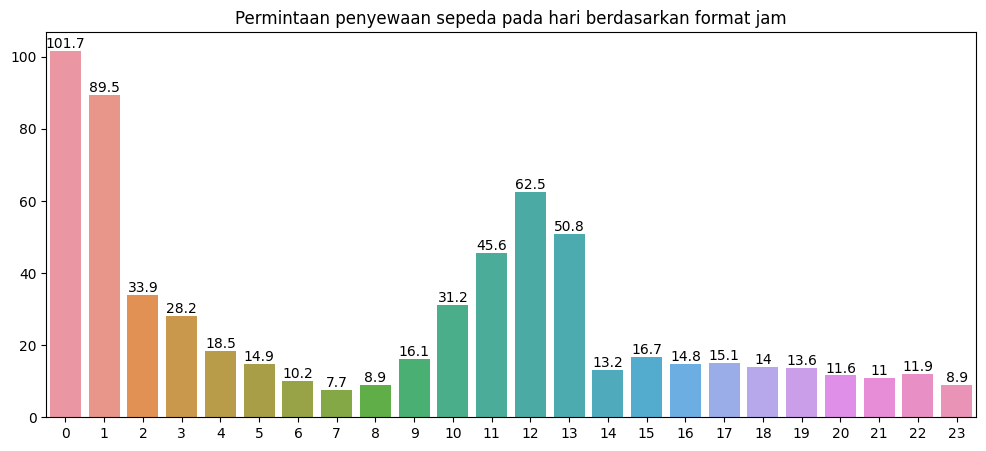

In [ ]:
# Permintaan penyewaan sepeda pada tiap jam
hourly_bike2 = (filtered_data.groupby('hour')['cnt'].sum()/10).round(1)
hourly_bike2

plt.figure(figsize=(12,5))

ax=sns.barplot(x=hourly_bike2.index, y=hourly_bike2.values, errorbar=None)
ax.set_title("Permintaan penyewaan sepeda pada hari berdasarkan format jam")
ax.set_xlabel('')

for i in ax.containers: ax.bar_label(i)

In [ ]:
filtered_data['cnt'].sum()

6505.0